# Systems of Linear Equations and Matrix Algebra

Before we jump into the use of empirical orthogonal functions (EOF) for analyses of space-time data, I like to provide some basics about linear algebra.  Fundamentally, the calculations that we will make in this class are based in the challenge of solving multidimensional systems of linear equations using matrix operations.  For some of you this will all be review, but I think it provides useful background for when we start rolling our own code for EOF and related analyses. 

First, let's go ahead and import NumPy so we can use its array and [linear algebra functions](https://numpy.org/doc/stable/reference/routines.linalg.html):

In [ ]:
import numpy as np 


Let's consider a simple 2 equation system of linear relationships with 2 unknowns, $x_1$ and $x_2$

$
x_1 + x_2 = 3 \\
2x_1 - x_2 = 3
$

We can ask ourselves, 'Is there a (unique) solution to this set of equations (values for $x_1$ and $x_2$ that make this entire system true)? Or are there no solutions? Or are there infinitely many solutions?'. Because this is a relatively simple set of only 2 equations, we might be tempted to just approach this as we learned way back in our K-12 days -- try and isolate one of the unknown $x$ values to solve for it and then plug that value into the equation to solve for the other unknown.  Or, since this is such a simple system. we might try graphing this and finding out where (or if) the two lines represented by these equations intersect, which would give us the solution as well using geometry. 

These approaches become less tractable, however, once we have more than these 2 equations, more than 2 unknowns, and therefore start to operate in multiple dimensions.  For instance, in the above system we could represent the two equations each as lines in a 2-dimensional space.  If we add a third unknown variable, we might think in 3-dimensions and visualize a plane that captures the relationships described by the equations.  But at increasing numbers of unknown variables and numbers of equations, it becomes both hard to visual and hard to 'brute force' solve for this system (or even to know if there is a unique solution)!  Linear algebra methods come to our rescue.  

Now, it turns out this system of equations does have a single simple solution.  We can visualize this solution by graphing sections of the two lines in 2-dimensions described by the equations:

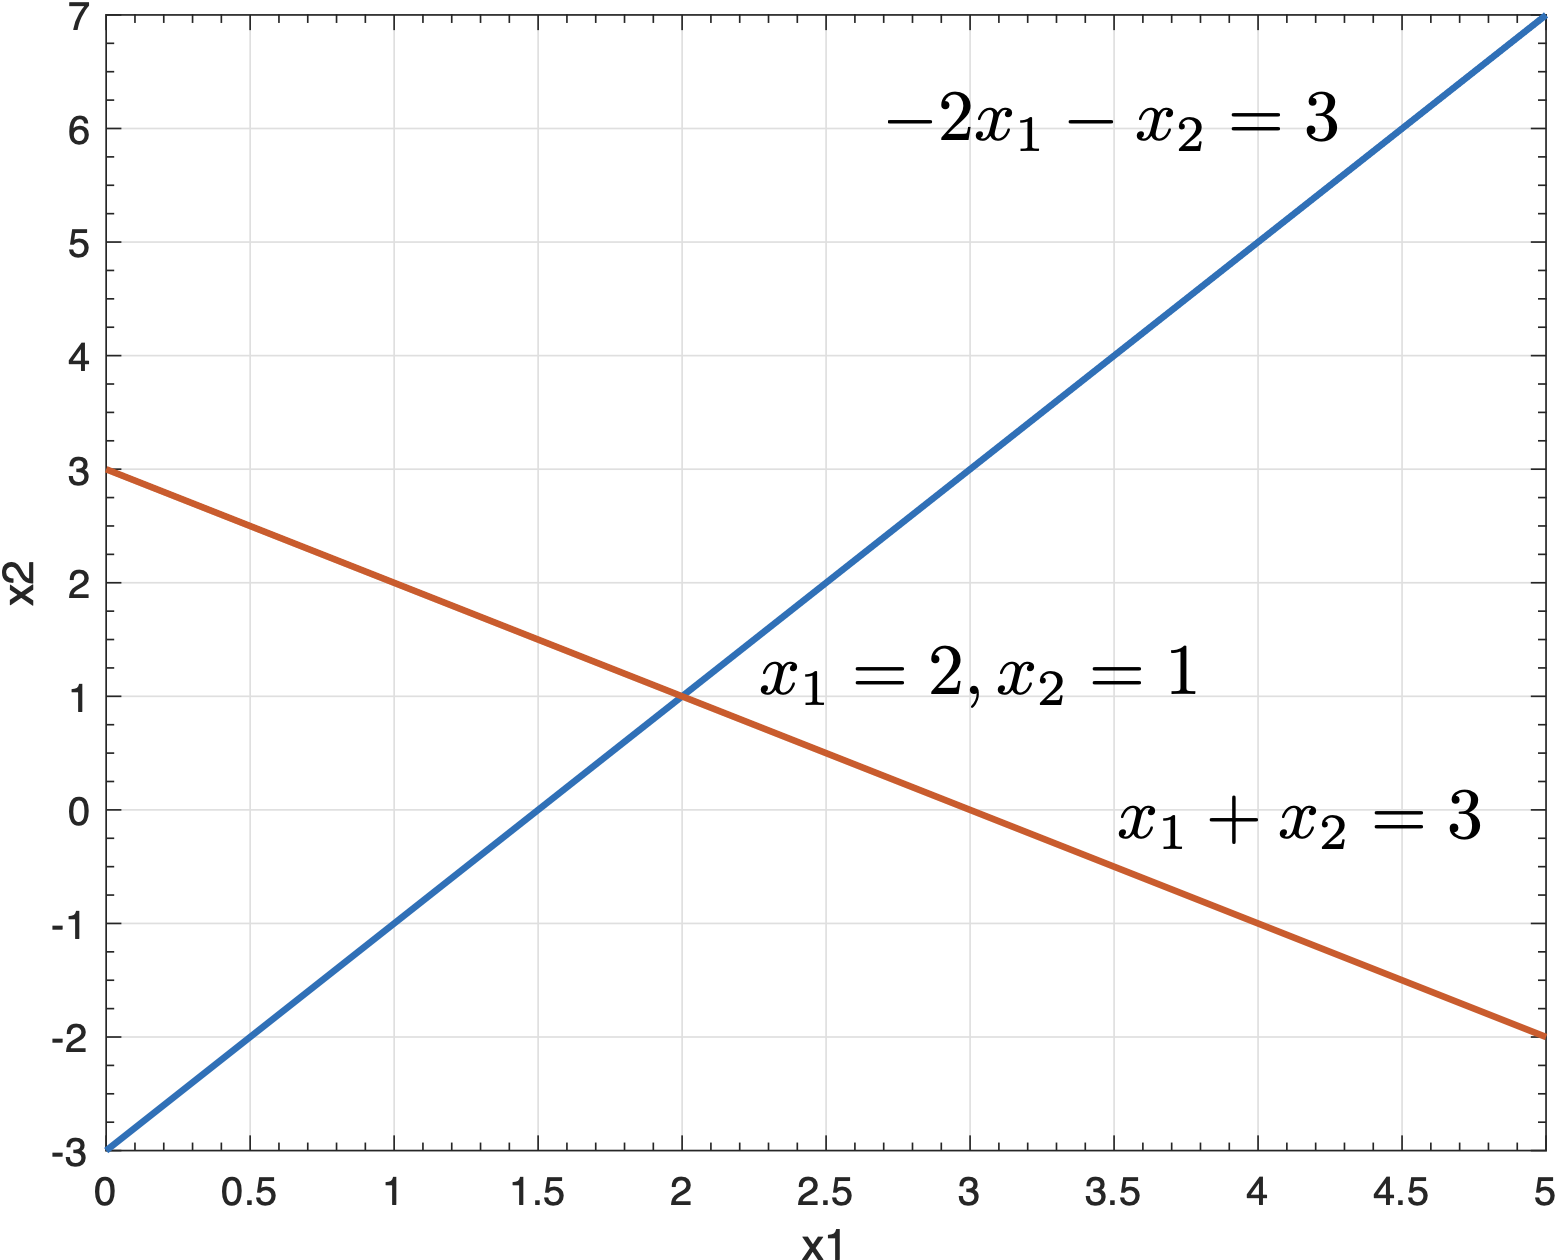{width=400}


Graphically then we can see that the solution to the system is unique, $x_1 = 2$, $x_2 = 1$.  This system happened to have a unique solution, but we can (graphically) imagine others where there would be no solution (the lines never cross, in the first image below) or infinite solutions (one equation is just a multiple of the other, the lines overlap in the second image below):

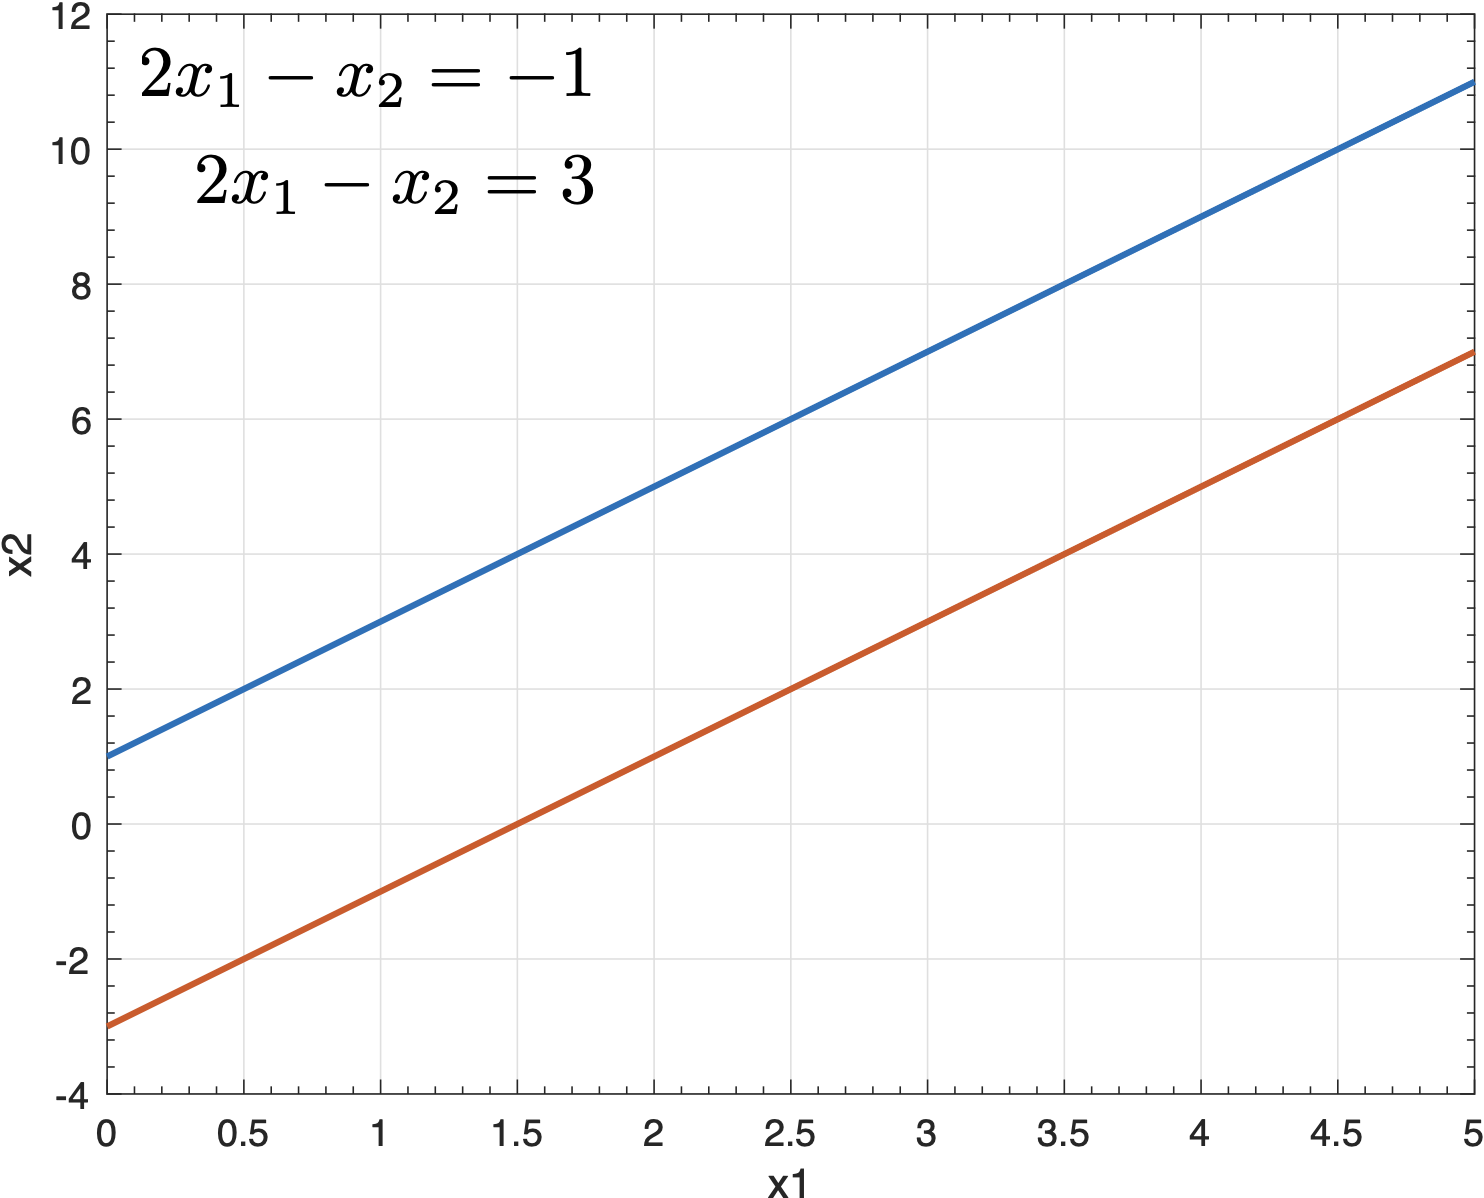{width=400} 
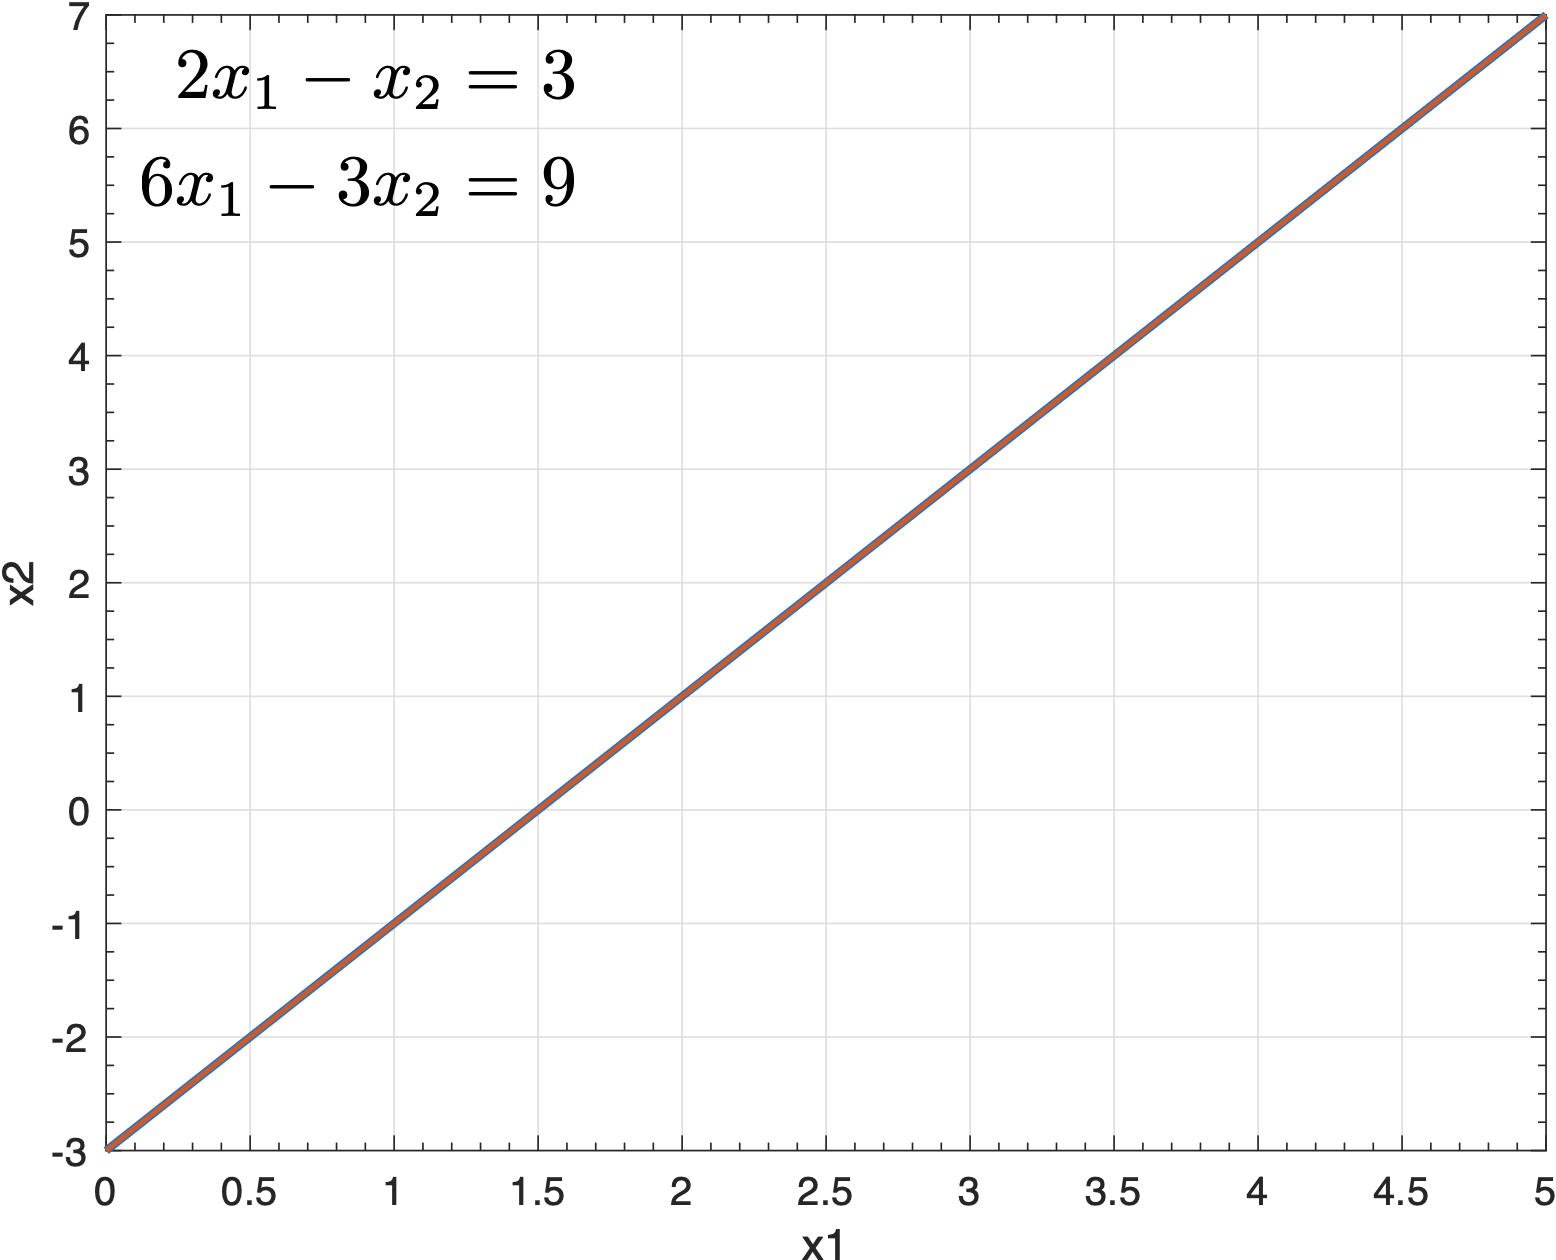{width=400}

With a larger system of (linear) equations and a greater number of unknowns, both visualizing and solving the system using brute force become more difficult.

## Matrix algebra

Let's approach this as a matrix algebra problem instead.  First, a few definitions:
* a **scalar** is a single number.  We can think of it as expressing a magnitude only
* a **vector** is a 1-dimensional array of numbers (either a row or a column of numbers).  Geometrically, we can think of it has expressing both a magnitude _and_ direction
* a **matrix** is a 2-dimensional (rows and columns) array of numbers. It is therefore rectangular - think of the rows and columns of a spreadsheet. 

The image below shows these visually and also indicates that each of these is easily expressed in NumPy.  Numpy considers vectors and matrices and N-dimensional arrays as 'arrays'. 

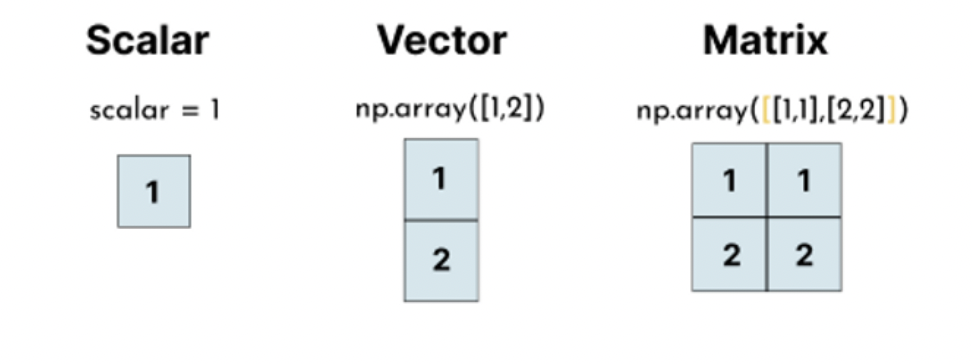{width=500}

In [ ]:
my_scalar = 1

my_vector = np.array([1,2])
print(my_vector.shape)

my_matrix = np.array([[1,1],[2,2]])
print(my_matrix.shape)
my_matrix

OK, with a few definitions under our belts, let's look at our system of linear equations again:

$
x_1 + x_2 = 3 \\
2x_1 - x_2 = 3
$

Instead of a list of equations with variables and coefficients, we can instead express this system using matrices and vectors and then solve using methods from matrix (linear) algebra.  In the equations, in front of every unknown $x$ is a scalar (either obvious, or implied to be 1 if not present).  We'll take these numbers and put them in a 2x2 matrix (2 equations each with 2 unknown $x$ variables) we'll call **A**:

$
\mathbf{A} = \begin{bmatrix} 1 & 1\\ 2 & -1\end{bmatrix}
$

Before moving on, make sure you understand where we got those numbers!

Since each equation has $x_1$ and $x_2$ in it, we can group these into a vector we'll call **x**, representing those two elements in each equation:

$
\mathbf{x} = \begin{bmatrix} x_1\\ x_2\end{bmatrix}
$

And finally, the righthand side of the equation (the solution to each equality, in this case) we can also put into a vector we'll call **b**:

$
\mathbf{b} = \begin{bmatrix} 3\\ 3\end{bmatrix}
$

Having done this, we can now re-express the original system of 2 equations as matrices and vectors:

$
\mathbf{Ax} = \mathbf{b}
$

How does this help?  First, in a much larger system of equations and unknown $x$, this notation is much more tractable. But more importantly, now that we are in matrix world, we have an array of approaches that allow us to find the vector values **x** that make the system true (assuming there is a unique solution). 

## Gauss-Jordan Elimination

In lecture, we'll see a step-by-step approach using Gauss-Jordan elimination to solve this by hand.  You may remember doing this in your linear algebra class.  It is a reasonable and intuitive rule-based approach for a small system of equations that you can do without programming.  But we can also do Gauss-Jordan elimination in Python using the `sympy` package and its `rref` method (RREF stands for 'reduced row echelon form').  Note for now that I'll use `np.matrix` here for clarity as it fits with our definitions above (and to emphasize we're using 2-dimensional data structures), which produces 2-dimensional (rows and columns) arrays in NumPy, [but `NumPy` now recommends simply using `np.array`, even for 2-dimensional matrix algebra](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html). 

Let's perform the same analysis we did by hand in lecture here in Python:

In [ ]:
import numpy as np # get NumPy to build matrices
import sympy as sym # sympy has a method for Reduced Row Echelon Format

# create matrices for A and b
A = np.matrix([[1,1],[2,-1]])  # this is our coefficient matrix from above - the set of scalars in from of each x
b = np.matrix([[3],[3]]) # this is the righthand side of the equations, the solutions to each equation

# join the matrices column-wise 
Ab = np.hstack((A,b))  # this is called the 'augmented matrix'
print(Ab)

In [ ]:
# find the Reduced Row Echelon Form from the augmented matrix, returns solution in a pretty LaTeX matrix
sym.Matrix(Ab).rref()[0]  # this will give us the RREF matrix which contains the solution, the [0] returns just the RREF

Cool, huh!  The same answer we got by hand in lecture and can be seen in the above graph of the equations, $x_1$=2 and $x_2$=1.  We can also say that this system of linear equations is _**consistent**_ -- that is, it has _at least_ one solution.

However, now that we are in programming world, we have a lot of other tools at our disposal we can use from linear algebra, not just `rref`. 

## Introduction of the Matrix Inverse

If we think about it, if **x** contains the unknown values, then the 'brute force' approach we learned when we first learned algebra would be to isolate the **x** on one side of the equation and solve using the known values in **A** and **b**. Or, in otherwords, we might think of it this way:

$
\mathbf{x} = \frac{\mathbf{b}}{\mathbf{A}}
$

As we'll see in a moment, though, that way of writing it really isn't correct.  Instead, let's use the following notation:

$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}
$

We 'divide' **b** by **A** (**A** is in the denominator), revealing the solution to **x**.  However, it is not quite so simple.  Division is (as you see from the way I wrote the second equation above) inherently multiplication by an inverse. But in matrix algebra, _it isn't guaranteed that **A** even has an inverse_.  Or to put it another way, technically there is no such thing as 'matrix division', rather we perform an operation that is the multiplication of the inverse, _if it exists_. 

In the case of the current system of equations, since we already know (from Gauss-Jordan elimination as well as a the graphical solution) that there is a unique solution to this system of equations, we might be confident that there is an inverse to **A** and that would allow us to find a solution.  Let's see how we might do this.

First, let's find the inverse of **A**.  In Python, this method lives in the `linalg` module of NumPy. Since we already imported NumPy above, we can use the `linalg` functions.  To calculate a matrix inverse for A, use `np.linalg.inv` and we use the notation $\mathbf{A}^{-1}$ for this inverse. 

In [ ]:
A_inv = np.linalg.inv(A) 
print(A_inv)

Looking at this $\mathbf{A}^{-1}$, you probably see some patterns there - the value in the inverse for the 1s are the same and share the same sign, the value in the inverse for the 2 is twice as large, etc.  We'll get a better sense of why this is in a moment, but for all intents and purposes, it appears the inverse here is the original matrix where each element is divided by 3!

Now that we have an inverse for **A** we can multiply **b** by the inverse to get the solution.  There are actually several ways we can multiply matrices in Python, although caution is warranted until we understand matrix multiplication better, as each potentially has a different result, depending on the dimensions of our matrices:

In [ ]:
# this is a 2x2 matrix and a 2x1 vector
print(A_inv.shape, b.shape) 

# simple, element-wise multiplication - but careful - WHY does this work in this case? 
print(A_inv * b)  # returns a 2x1 numpy matrix, BUT BE CAREFUL - more on this below

# matrix multiplication using @ as the dedicated operator for matrix multiplication
print(A_inv @ b) # returns a 2x1 numpy matrix

# uses NumPy's matmul
print(np.matmul(A_inv,b)) # returns a 2x1 numpy matrix


Using the multiplication of the inverse of **A** and **b** gives us the correct answer.  We'll learn more about matrix multiplication below, but it is import to provide a first warning for you: matrix multiplication between two matrices is valid only if the number of columns in the first matrix is equal to the number of rows in the second matrix.  More on this later.  

In [ ]:
# let's solve for x and move on
x = A_inv @ b
print(x)

## More about vectors and matrices

As we'll discover, matrices have particular and in some case special properties that allow us to determine, for instance, if their elements are linearly dependent, whether the matrix has an inverse, and whether a system of linear equations has a unique solution or not.  Let's take a look at some other properties of vectors and matrices. 

First, an aside on vectors.  When I defined them above, I said we could think of vectors (as opposed to scalars) are containing information about both magnitude and direction.  Huh?  Let's think geometrically here about the solution ($x_1 = 2$, $x_2 = 1$) from the above system of linear equations.  While the solution is a column vector containing 2 numbers and indicating a location in 2-dimensional space, we might also think of it as an arrow starting from the origin and arriving at $x_1 = 2$, $x_2 = 1$, like so:  

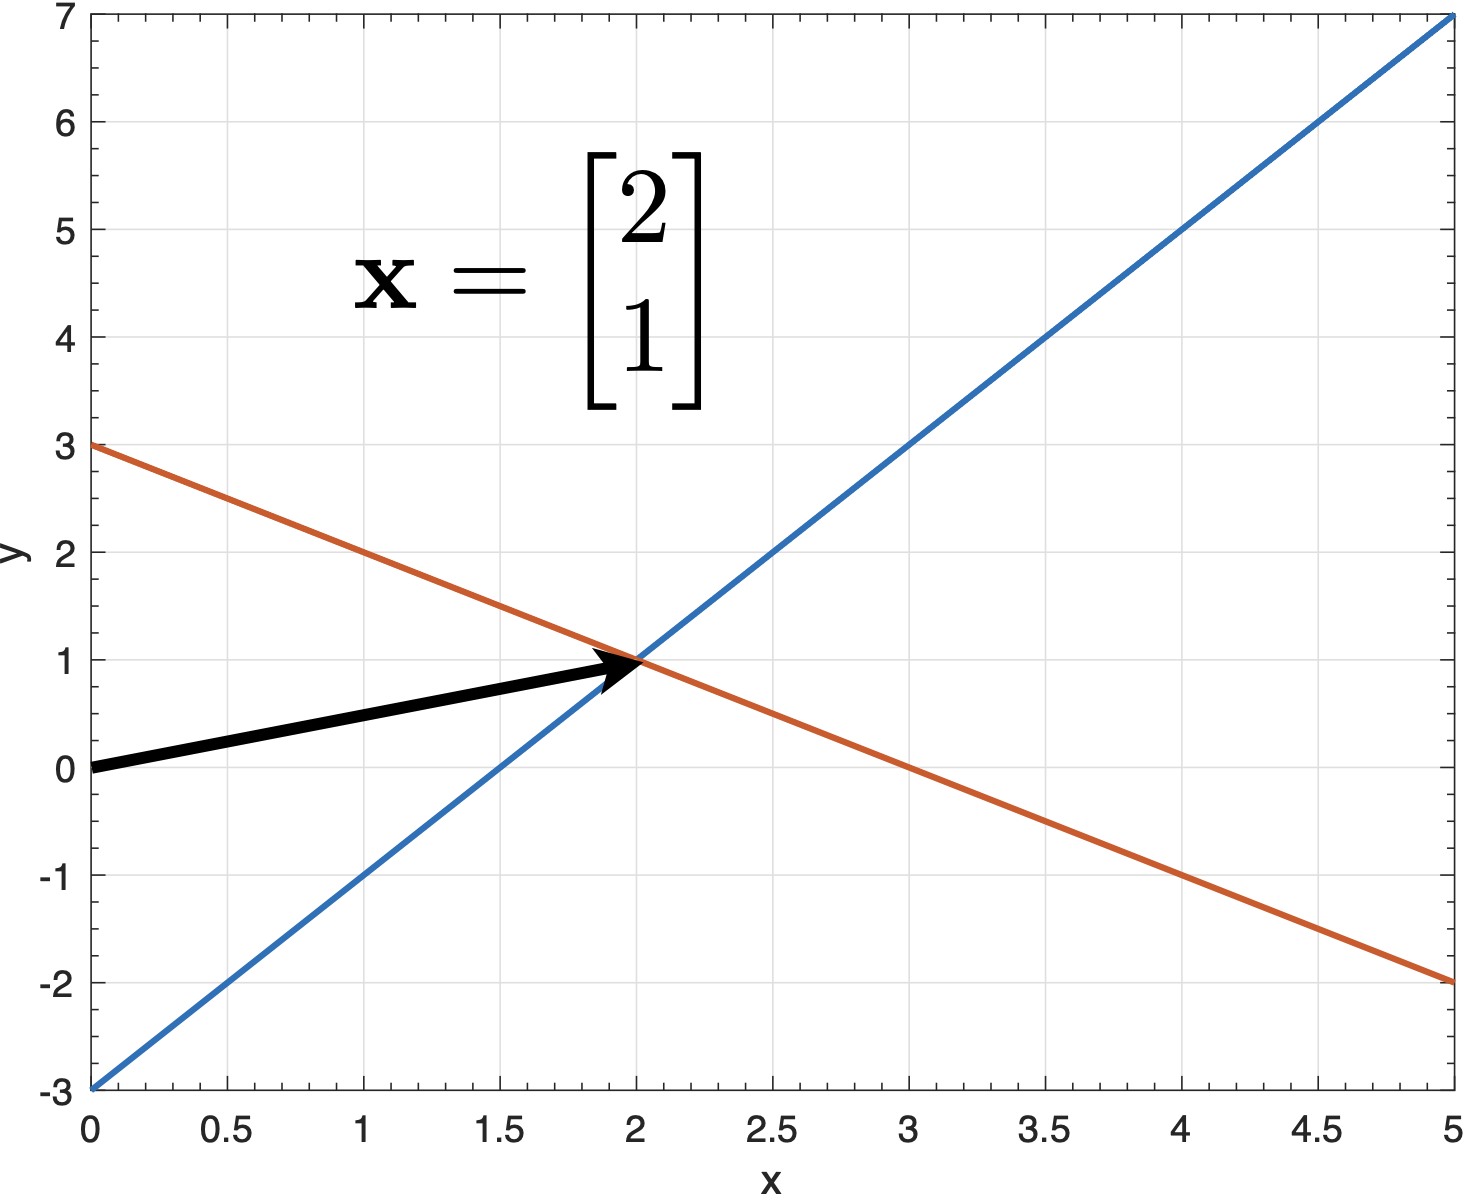{width=400}

Especially those of you that are geographers might already recognize this as one way to think about the Euclidean distance (here between the origin at 0,0 and the solution) -- the length of a line segment between the two points.  But we might also think of the length of this line as a _magnitude_ of the vector.  A `norm` is a way we can measure the length or size of a vector (or matrix) - they allow us to quantify the magnitude.  The magnitude of the vector here is the Eucliean norm, the 2-norm, or the $L^2$ norm.  [There are other norms](https://en.wikipedia.org/wiki/Norm_(given_name)).  

The Euclidean distance or Euclidean norm is calculated (from trigonometry) as the square root of the sum of squares of the  components of the vector (here there are 2 components, the $x_1$ and $x_2$ directions) - or, as we might envision it in this 2-dimensional system, the length of the sides of a triangle where the hypotenuse is the shortest distance between the point $x_1 = 2$, $x_2 = 1$ and the origin

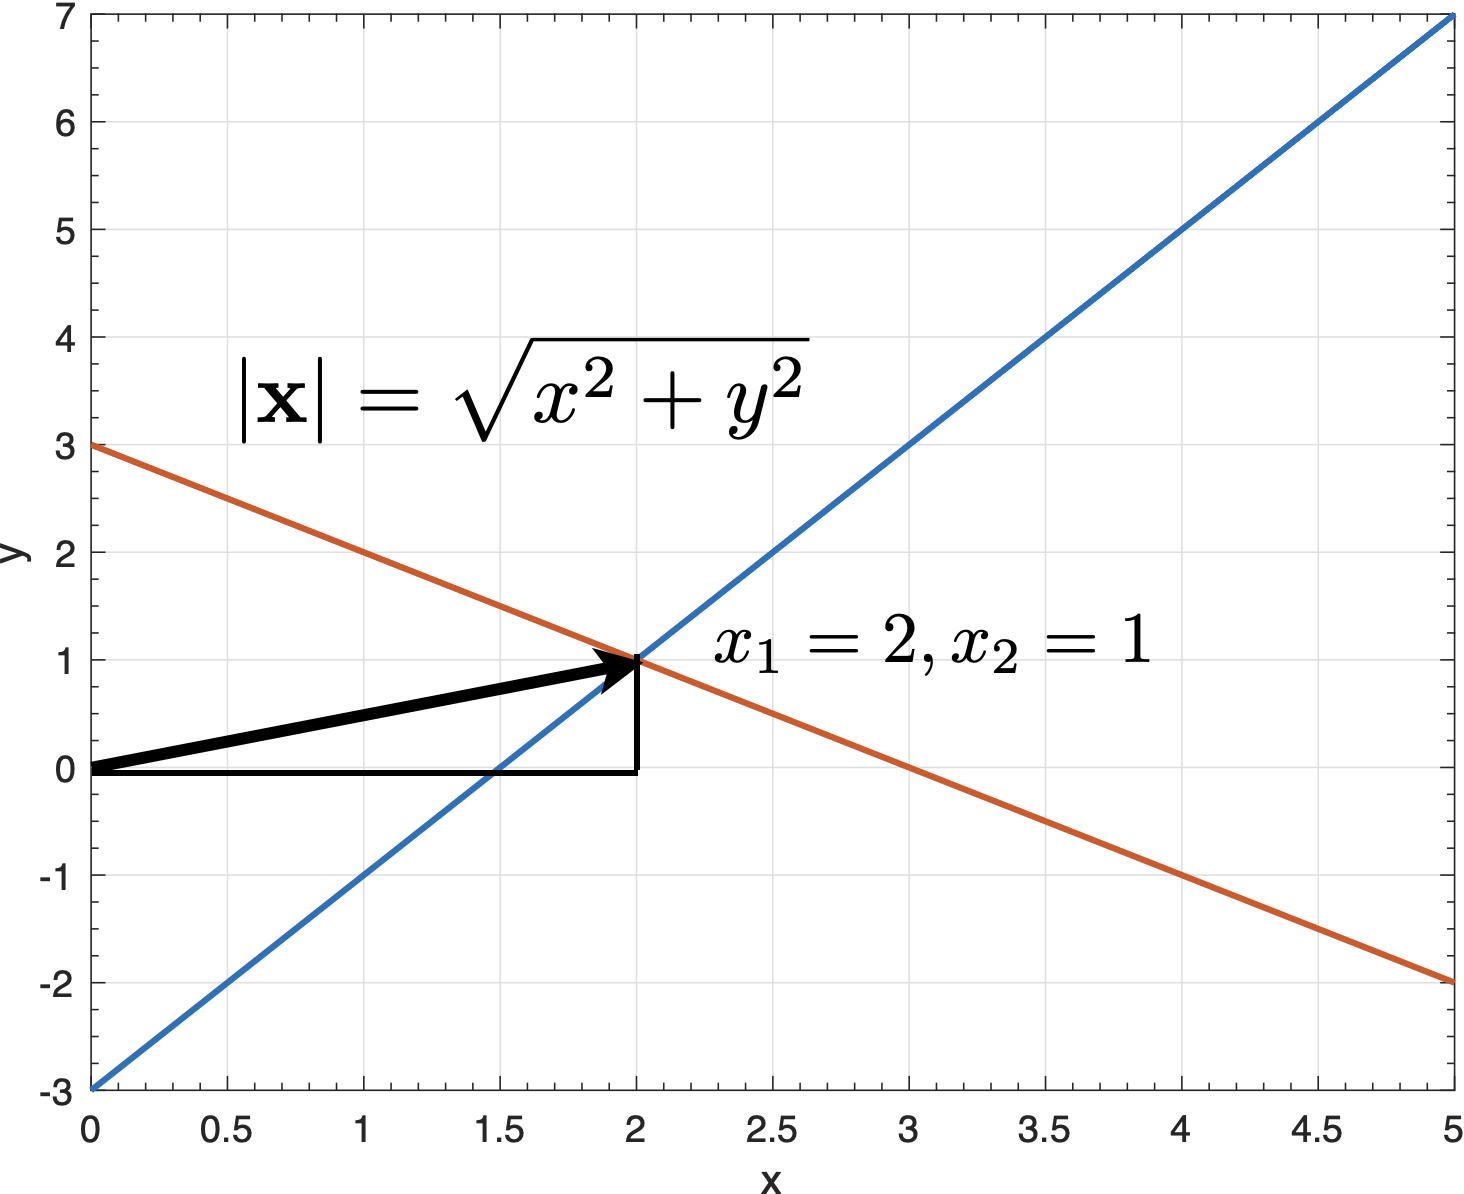{width=400}

Reaching back into our brains for trigonometry, we could calculate this using Pythagorean theorem (!).  We `import math` for the [math module in base Python](https://docs.python.org/3/library/math.html), which has (amongst other useful ones), the square root function.

In [ ]:
import math 

x1 = 2
x2 = 1

math.sqrt((x1**2 + x2**2))


Since the norm is a property of vectors and matrices, there is also a specific linear algebra function for this in NumPy ([`linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)):

In [ ]:
print(np.linalg.norm(x))

We will also in the future call the specific case where the `norm` of a vector is equal to 1 a **unit vector**, something we'll encounter later in the course. 

We can also define the `rank` of a matrix.  The rank of the matrix tells us the number of **linearly independent** columns of a matrix.  Generally speaking, the rank of a matrix is less than or equal to the length of the minimum dimension (rows or columns) of a matrix.  Thus, for a matrix **A** the rank of that matrix is less than or equal to the minimum dimension of the number of rows $m$ or the number of columns $n$:

$
rank(\mathbf{A}) \leq \min(m,n)
$

In [ ]:
np.linalg.matrix_rank(A)

Since our matrix **A** has two columns and has a rank of 2, this indicates 2 columns that are _linearly independent_ from one another.  If the rank of the matrix is equal to the the number of columns (as it is here) we call it **full rank**. If the rank is less than that, it is called **rank deficient** and this suggests that the data are possibly dependent (or related) to one another.

Having said this, what does it mean for the columns of a matrix to be _**linearly (in)dependent**_?  We say that a set of vectors are linearly independent if none of its vectors is a linear combination of the others.  Conversely, a set of vectors is linearly dependent if at least one of the vectors is a linear combination of the others.  Mathematically then, a set of vectors (let's call them $v_1$, $v_2$, $v_3$ ... $v_k$) is linearly independent if the following equation has _only_ the trivial solution where _all_ the scalars $x$ are zero:

$
x_1v_1 + x_2v_2 + x_3v_3 + ... x_kv_k = 0
$

If all the $v$ are individual columns of the matrix **V**, then this is equivalent to finding that only the _trivial solution_ (all zeros) is the solution to:

$
\mathbf{V}\mathbf{x}=0
$
 

Let's do that for **A**, which has two columns, $a_1 = (1,2)$ and $a_2 = (1, -1)$:

$
\mathbf{A}\mathbf{x} = 0
$

As we did above, we can solve this equation using the inverse of A, but now instead of **b** we have a 2x1 vector of zeros, which we can get from the `np.zeros` function:

In [ ]:
x = A_inv @ np.zeros((2,1))
print(x) # returns the trivial answer!  So these vectors are indeed linearly independent

We'll see later that the concept of linear dependence is an important one.  Remember, we introduced spatiotemporal data in the first and second lecture as data that, for a host of good reasons, are very typically related to each other - in space, in time, via a deterministic process or causality, etc.  

The concept of _**rank deficiency**_ will also become important.  Take for instance the example of the global gridded sea surface temperature datasets that come from NOAA or the Hadley Centre.  Consider the spatial dimension of these datasets across the world oceans, hundreds of latitude and hundreds of longitude points mean these dataset can have tens of thousands of spatial locations where we have observations, but we have relatively few temporal observations (a bit more than 100 years) because we've only been measuring for a relatively short amount of time.  Climate datasets are often _severely_ rank deficient therefore, not only with locations >> observations, but also those observations being quite linearly dependent on one another.

## Systems of linear equations with no solutions or infinite solutions

Thus far we've been using a set of linear equations that are well-behaved - there is a single unique solution, the vectors in the matrix are linearly independent, and the matrix is full rank.  But let's look at other simple systems where these characteristics don't hold.  

First, let's consider a system of equations with no solution:

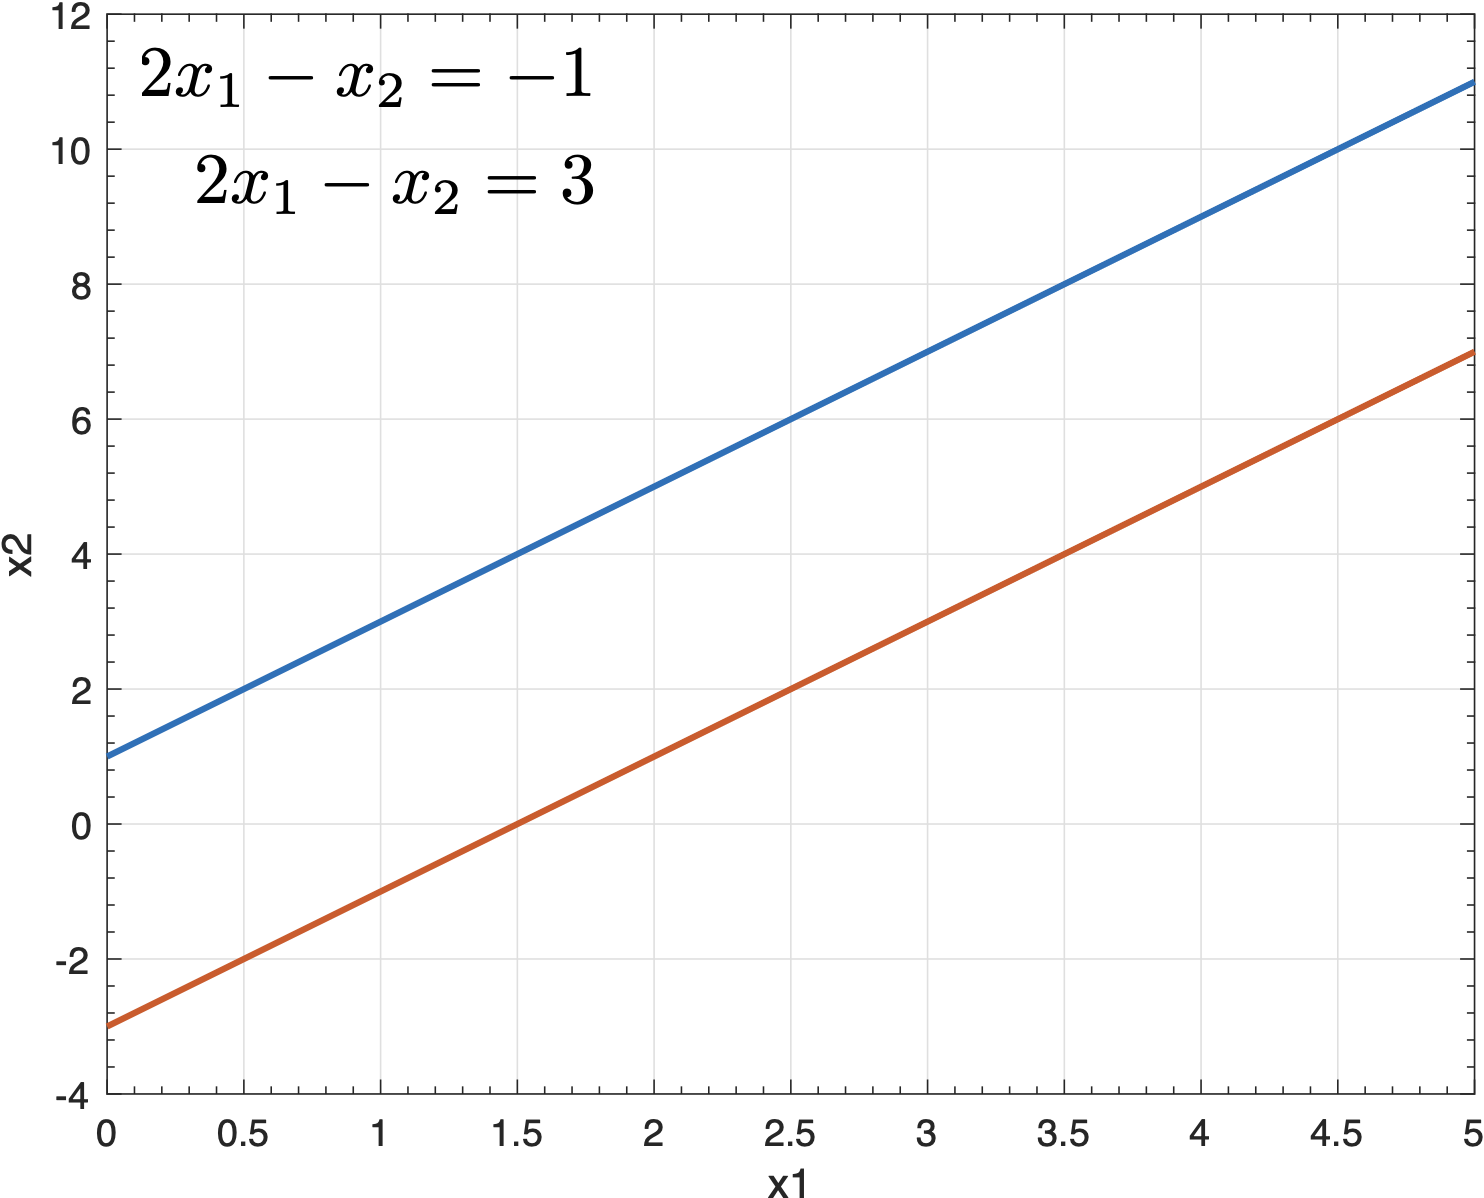{width=400}

We can see the lines described by the two equations never cross -- they are parallel -- and therefore there is no value for $x_1$ and $x_2$ that will make this system true.  

In [ ]:
# this is the coefficient matrix - the set of scalars in front of each x variable
A = np.matrix([[2, -1], [2, -1]])

# this is the righthand side of the equations, the solutions to each equation
b = np.matrix([[-1], [3]])

# make the augmented matrix
Ab = np.hstack((A,b))  

# do the Gauss-Jordan elimination
# this will give us the RREF matrix which contains the solution, the [0] returns only the RREF
sym.Matrix(Ab).rref()[0]


Looking at the RREF, we see we have a problem.  Look at the bottom row in particular - the implication is that somehow 0 = 1, which clearly isn't true.  Also, there isn't a single 'pivot' (value of 1) in each row.  We are forced to conclude there is no solution to this system of equations - we say this system of equations is **inconsistent**. 

We can also see that the matrix **A** is rank deficient, with 2 columns (and 2 rows), but a rank of only 1:

In [ ]:
np.linalg.matrix_rank(A)

Let's look at the other extreme case, where there are infinitely many solutions:

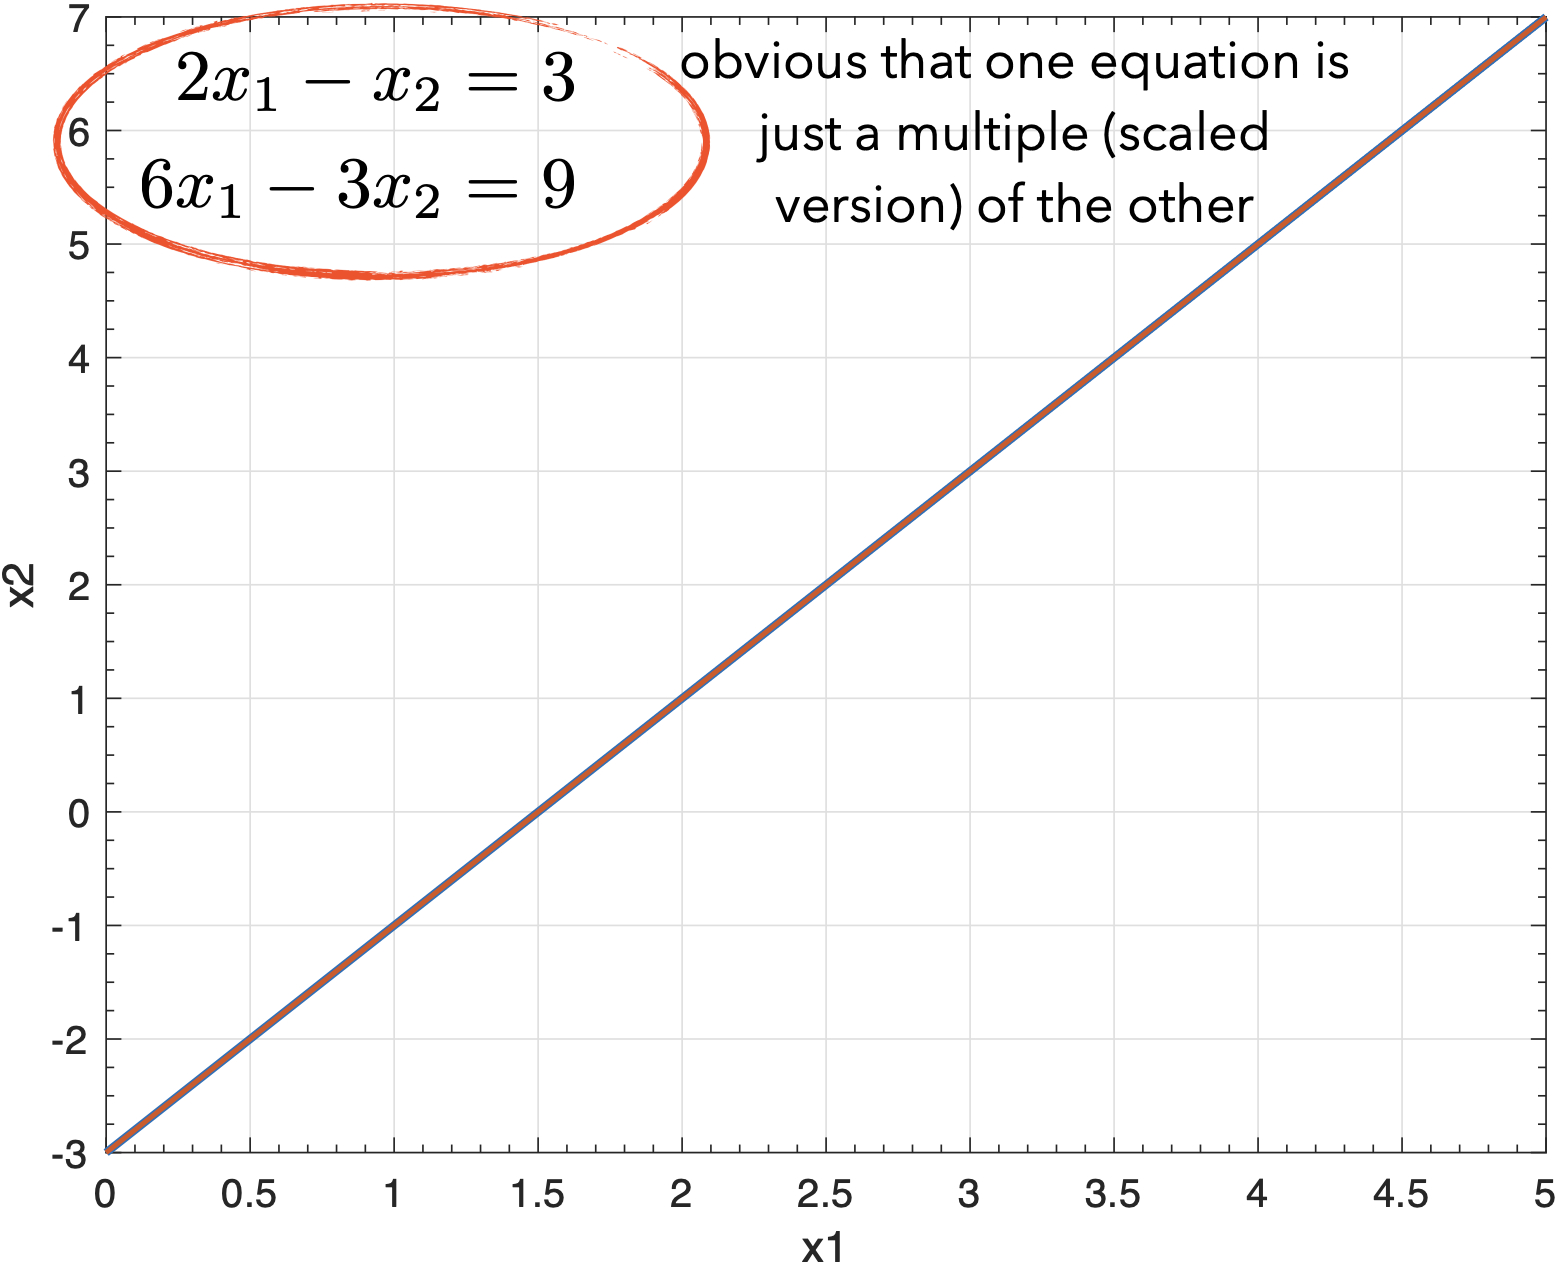{width=400}

Applying Gauss-Jordan elimination to this system, we again find that something is amiss:

In [ ]:
# this is the coefficient matrix - the set of scalars in front of each x variable
A = np.matrix([[2, -1], [6, -3]])

# this is the righthand side of the equations, the solutions to each equation
b = np.matrix([[3], [9]])

# make the augmented matrix
Ab = np.hstack((A, b))

# do the Gauss-Jordan elimination
# this will give us the RREF matrix which contains the solution, the [0] returns only the RREF
sym.Matrix(Ab).rref()[0]

Observe the 2nd line again - while it is trivially true that 0=0, this means that $x_2$ is unconstrained and could take any value.  We can once again see that the matrix **A** is rank deficient:

In [ ]:
np.linalg.matrix_rank(A)

What has happened?  In the system above, the second equation is just the combination of the first equation mulitplied by a scalar, and therefore the two equations are [collinear](https://en.wikipedia.org/wiki/Collinearity) and they are linearly dependent.  We would say that this system of equations is still **consistent** (there is at least one answer), but rank deficient, dependent, and _**under-determined**_.

More generally, we can observed that when $\mathbf{Ax} = \mathbf{b}$ has a single unique solution, the vectors (columns of numbers) that make up **A** are linearly independent.  But when $\mathbf{Ax} = \mathbf{b}$ has more than one solution, the vectors in **A** are linearly dependent and the system is underdetermined. 

## More on vector and matrix operations 

In solving $\mathbf{Ax} = \mathbf{b}$ above, we used **multiplication** by the inverse of **A** to solve for **x**.  In general, Python (and most programming langauges) recognize two broad classes or way of multiplying vectors or matrices.

First, we can do an elementwise multiplication, where two matrices or vectors have the same size, and the multiplation proceeds by finding the product of each of the numbers in the same position in the two vectors or matrices.  Take the following two vectors, $v$ and $u$.  

$
\mathbf{v} = \begin{bmatrix} 1\\2\end{bmatrix}, \mathbf{u} = \begin{bmatrix} 3\\4\end{bmatrix} 
$

We can do elementwise multiplication because they are the same size, effective calculating:

$
\begin{bmatrix}
v_1 \times u_1\\
v_2 \times u_2
\end{bmatrix}
$

and 

$
\begin{bmatrix} 1 \times 3\\2 \times 4 \end{bmatrix} = \begin{bmatrix} 3\\8\end{bmatrix}
$

Elementwise multiplication of a 2x1 size matrix and another 2x1 size matrix gives us another 2x1 matrix for the answer. 

In [ ]:
v = np.array([[1],[2]])
u = np.array([[3],[4]])
v * u

This works simply by multipling the corresponding entries by one another.  Row 1 and Column 1 of the vector $v$ with Row 1 and Column 1 of vector $u$, and so on. 

But the other type of matrix or vector multiplication that will be important for us is the inner or **dot product**.  Taking $v$ and $u$ as the 2x1 matrices we specified above, we now write the dot product as:

$
\mathbf{v} \cdot\ \mathbf{u}
$

Unlike elementwise multiplication, the dot product is the _**sum of the products**_ of the corresponding entries of the vectors.  We can expand the dot product thus:

$
\mathbf{v} \cdot\ \mathbf{u} = \sum_{i=1}^{n} v_{i} u_{i} = v_{1} u_{1} + v_{2} u_{2} ... v_{n} u_{n}
$

In our specific example, the dot product is the sum of the product of the numbers in the first row with the product of the numbers in the second row:

$
\begin{bmatrix} (1 \times 3) + (2 \times 4) \end{bmatrix} = 11
$

Unlike the elementwise multiplication, the dot product of a 2x1 vector and another 2x1 vector is a scalar (or, if you like 1x1).  This change of dimension is characteristic of matrix multiplication.  In the case of the dot (inner) product, the second dimension of the first matrix/vector has to match the first dimension of the second matrix/vector.  Or, in otherwords, the inner dimensions of the matrices must be the same, with the outer dimensions giving you the size of the output.  

In Python we can calculate the dot product using `np.dot`, but we need to `transpose` the vector $v$ first.  Why? Well, our vectors both have the dimension of 2x1 and 2x1 -- their inner dimensions don't agree. Transposing switches the rows and columns of a matrix and at the same time swaps the dimensions - so, transposing a 2x1 column vector gives you a 1x2 row vector in return.  We transpose an array in Python by using `.T`:

In [ ]:
print(v) # our 2x1 column vector
print(v.T) # the transpose of the 2x1 column vector is a 1x2 row vector

Transposing is a property of the `ndarray` objects from NumPy, although it makes most mental and visual sense when applied to vectors or matrices.  We write the general equation for a transpose as:

$
[A^T]_{ji} = A_{ij}
$

Or, for every value in position row $i$ and column $j$, the transpose places that value in the position of row $j$ and column $i$. 

Here are a few examples:

$
A = \begin{bmatrix}1\\2\\3\\4\end{bmatrix}, A^T = [1\; 2\; 3\; 4]
$

$
A = \begin{bmatrix}1 & 2\\3 & 4\end{bmatrix}, A^T = \begin{bmatrix}1& 3 \\ 2 & 4\end{bmatrix}
$

$
A=\begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{bmatrix},
A^T = \begin{bmatrix}
1 & 3 & 5\\
2 & 4 & 6
\end{bmatrix}
$

In order to calculate the dot (inner) product therefore, we need to first transpose $v$ so that it has the dimension of 1x2.  Then with $u$ having the dimension if 2x1, the inner dimensions are the same, and the outer dimensions (1 and 1) provides the dimension for the result of the dot product:

In [ ]:
print(v.shape) # (2,1)
print(u.shape) # (2,1)
print(v.T.shape) # (1,2)

print(np.dot(v.T,u)) # (1,2) x (2,1) gives us a scalar -- 11 -- as expected

Geometrically (since we're talking about vectors here!) we can interpret the dot product as reflecting the product of the magnitude (the `norm`!) of both vectors and the angle ($\theta$) between them:

$
\mathbf{v} \cdot\ \mathbf{u} = ||\mathbf{v}||\ ||\mathbf{u}||\ cos(\theta)
$

Geometrically, the dot product tells us something about how closely one vectors 'follows' the path of the other (or another way to look at it is it tells us how much one vector projects onto the other).  

We will be interested in this class in the special case where the dot product of two vectors is zero.  Consider the following two vectors, $q$ and $r$ where:

$
q = \begin{bmatrix}
-5\\
3
\end{bmatrix}
$ 

and 

$
r = \begin{bmatrix}
3\\
5
\end{bmatrix}
$

We can draw these two vectors:

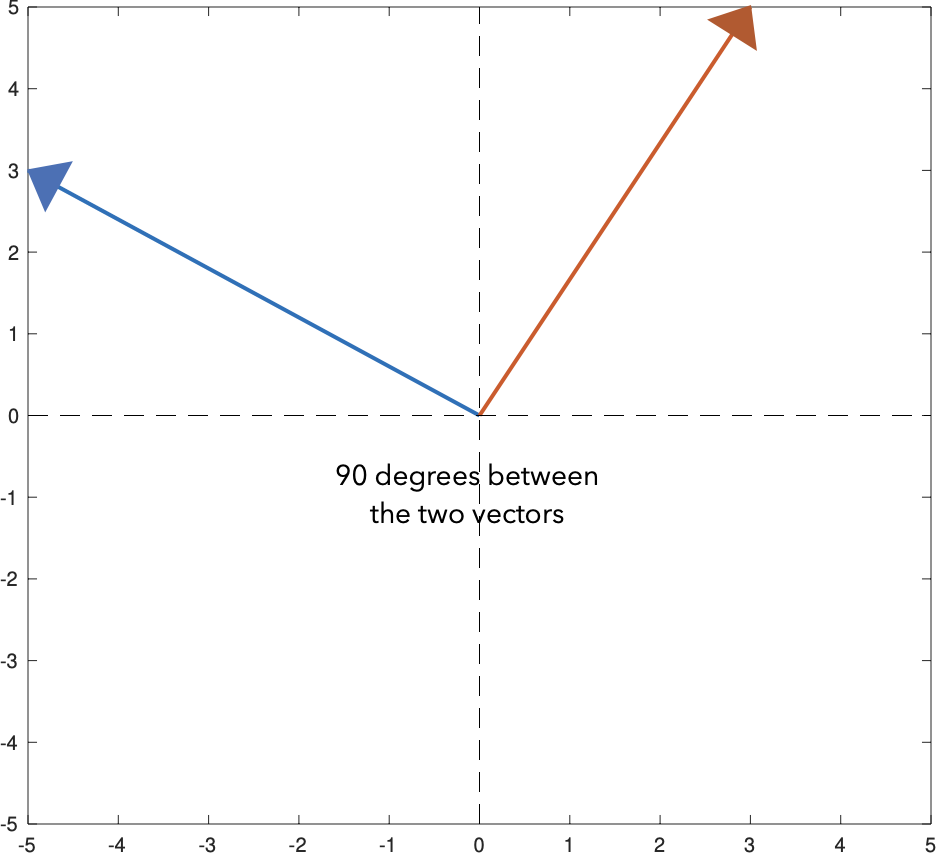{width=500}

Notice that the two vectors are at right angles to one another.  Or, to look at it another way, no part of vector $q$ projects onto vector $r$, or vice versa.  For a 90 degree angle, $\mathbf{v} \cdot\ \mathbf{u} = |\mathbf{v}||\mathbf{u}| cos(\theta)$ is equal to zero.  We therefore say that $q$ and $r$ are **orthogonal** to one another.  This concept will be important when we start to think about eigenvectors in a couple of weeks:

In [ ]:
q = np.matrix([[-5],[3]])
r = np.matrix([[3],[5]])
print(q.T @ r)

Finally in this section, let's consider multiplication of a matrix and a vector.  Earlier in this notebook, we showed that the solution to the system of linear equations:

$
x_1 + x_2 = 3 \\
2x_1 - x_2 = 3
$

Had a single unique solution of:

$
\mathbf{x} = \begin{bmatrix} 2\\ 1\end{bmatrix}
$

We had solved this using both Gauss-Jordan elimination as well as multiplication by the inverse of **A**, but we can also demonstrate how multiplication by of a vector and matrix work by showing the solution to **Ax** is indeed **b**.

Let's take out simple equation again:

$
\mathbf{Ax} = \mathbf{b}
$

And recall that:

$
\mathbf{A} = \begin{bmatrix} 1 & 1\\ 2 & -1\end{bmatrix}
$

and 

$
\mathbf{b} = \begin{bmatrix} 3\\ 3\end{bmatrix}
$

Let's go through the steps to show that our solution **x** was correct:

In [ ]:
# this is the coefficient matrix - the set of scalars in front of each x variable
A = np.matrix([[1, 1], [2, -1]])

# this is x, the righthand side of the equations, and the solutions to the equations
x = np.matrix([[2], [1]])


Before we solve using matrix operations in Python, let's do this 'long hand'.  We see we have a 2x2 matrix (**A**) and a 2x1 vector **x**:

$
\mathbf{Ax} = \begin{bmatrix} 1 & 1\\ 2 & -1\end{bmatrix} \begin{bmatrix} \textcolor{red}{2}\\ \textcolor{blue}{1}\end{bmatrix} = \mathbf{b}
$

A few rules for matrix multiplication:

* The number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.  We meet that requirements here - the number of columns in **A** is 2, and the number of rows in **x** is 2.  
* The resulting matrix (or vector) will have the same number of rows as the 1st matrix, and the same number of columns as the 2nd matrix.  That means we expect an answer that has 2 rows (as **A** has two rows) and 1 column (as **x** has 1 column).  That's good because above we calculated an answer for **b** that was 2x1!
* In otherwords, in order to multiply an $m×n$ matrix by an $n×p$ matrix, the '$n$' (the inner dimension) must be the same, and the result is an $m×p$ sized matrix.

We previously looked at an equation for the dot product of two vectors, but the rule we learned there (multiply the corresponding elements of each matrix and take the sum), generalizes to matrices.  You can think of the columns of a matrix as a collection of vectors:

* The product of matrix multiplication is found by multiplying each term in the $i$ th row of the first matrix and the $j$ th column of the second matrix, and and summing the products.  So for our 2x2 matrix **A** and our 2x1 matrix **x**, the solution in **b** is calculated as:

$
\begin{bmatrix} (a_{1,1} \times x_{1,1}) + (a_{1,2} \times x_{2,1})\\ (a_{2,1} \times x_{1,1}) + (a_{2,2} \times x_{2,1})\end{bmatrix} = \mathbf{b} 
$

Using red to show the values in $x_{1}$ and blue to highlight the value in $x_{2}$, the calculation is therefore:

$
\mathbf{Ax} = \begin{bmatrix} (1 \times \textcolor{red}{2}) + (1 \times \textcolor{blue}{1})\\ (2 \times \textcolor{red}{2}) + (-1 \times \textcolor{blue}{1})\end{bmatrix} = \mathbf{b}
$

And the answer is: 

$
A\mathbf{x} = \begin{bmatrix} \textcolor{red}{2} + \textcolor{blue}{1}\\ \textcolor{red}{4} - \textcolor{blue}{1}\end{bmatrix} = \begin{bmatrix} 3 \\ 3\end{bmatrix}
$

Which fortunately is what we got above! 

Now, the nice thing about having a computer to do the work for us is that we don't need to do the individual product sums as we just did, we can just ask the computer to do it for us:

In [ ]:
A = np.matrix([[1,1],[2,-1]])  # this is our coefficient matrix from above - the set of scalars in from of each x
x = np.matrix([[2], [1]])

# Three ways of doing matrix multiplication
print(A @ x)
print(np.matmul(A,x))
print(np.dot(A,x))

Let's complete this section by looking at a generic case of multipling two matrices: 

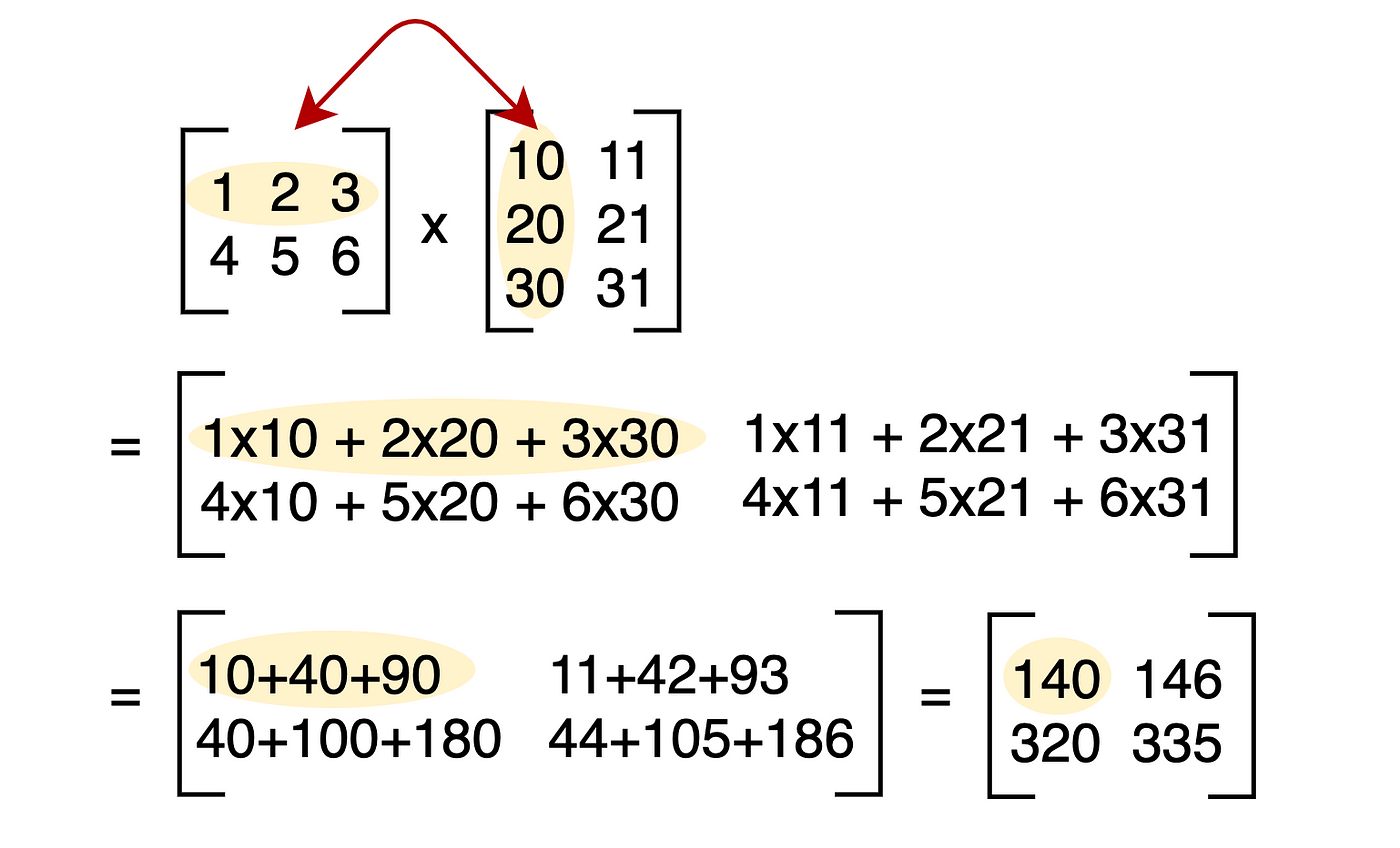{width=500}

We can put these two matrices into Python:

In [ ]:
A = np.array([[1,2,3],[4, 5, 6]]) # this is a 2 row by 3 column matrix, A.shape
B = np.array([[10, 11],[20, 21],[30, 31]]) # this is a 3 row by 2 column matrix, B.shape

Let's try `np.dot` first, to give us the dot (inner) product of the two matrices:

In [ ]:
print(np.dot(A, B))  # A is 2x3 and B is 3x2, so their dot product will be 2x2

We can also use the `@` operator for matrix multiplication:

In [ ]:
print(A @ B)

And, as above, we can use NumPy's `np.matmul` for MATrix MULtiplication as well:

In [ ]:
print(np.matmul(A,B))

However, now that we have two different matrices with two different sizes, the 'normal' multiplication operator, `*` returns an error - why?

In [ ]:
print(A*B)

The reason that we were able to successfully use `* ` in previous examples was that Python's default behavior is to try and broadcast across the different shaped arrays.  Broadcasting refers to how NumPy'a '[treats arrays with different shapes during arithmetic operations](https://numpy.org/doc/stable/user/basics.broadcasting.html)'.  Previously, when we had a matrix of 2x2 and a vector of 2x1, NumPy's broadcasting found that both arrays had a size of 2 in the row position and made a calculation based on that common dimension size.  Whereas above, the 2x3 and 3x2 matrix don't have a dimensional size in common on which to broadcast.

Broadcasting has its uses - as we'll see shortly, it can help speed up some calculations, for instance.  But this is another thing in Python that is _**dangerous**_, so always ensure when you are doing matrix multiplication that you are using one of the three methods - `np.dot`, `np.matmul`, or `@`

Here are some general rules for matrix multiplication:

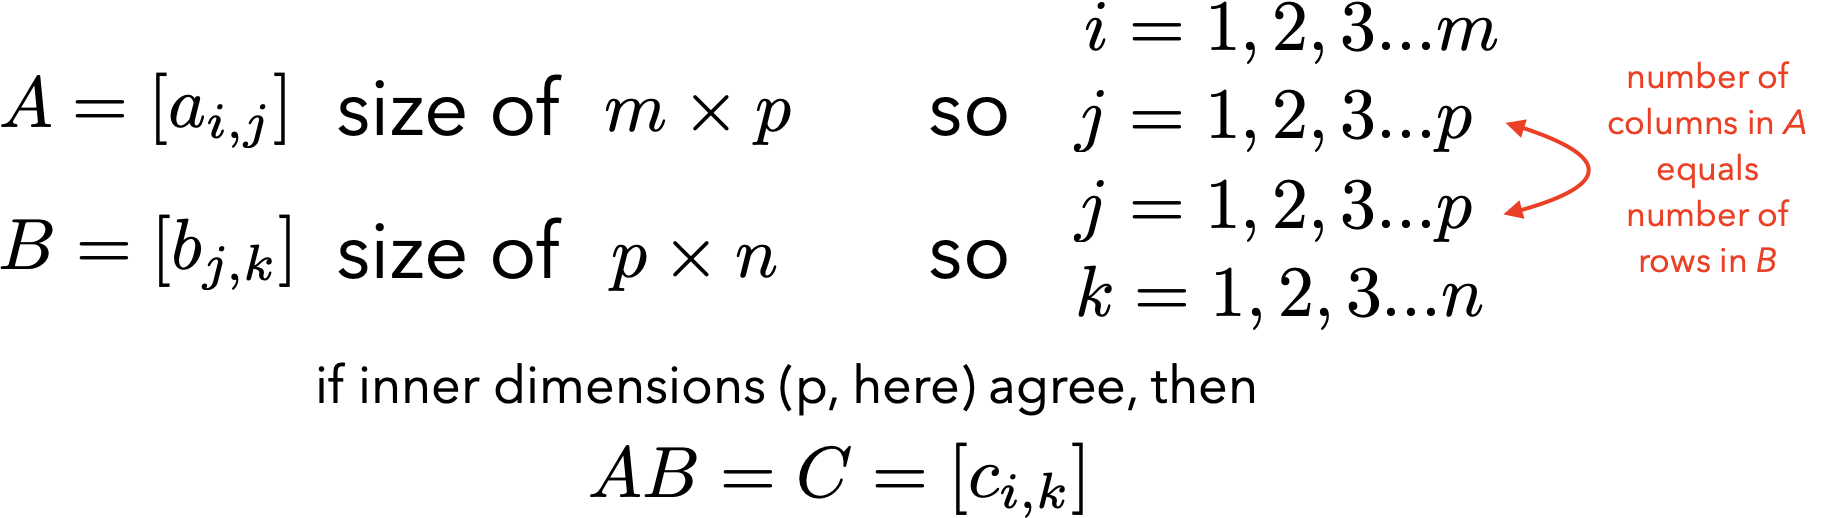{width=500}

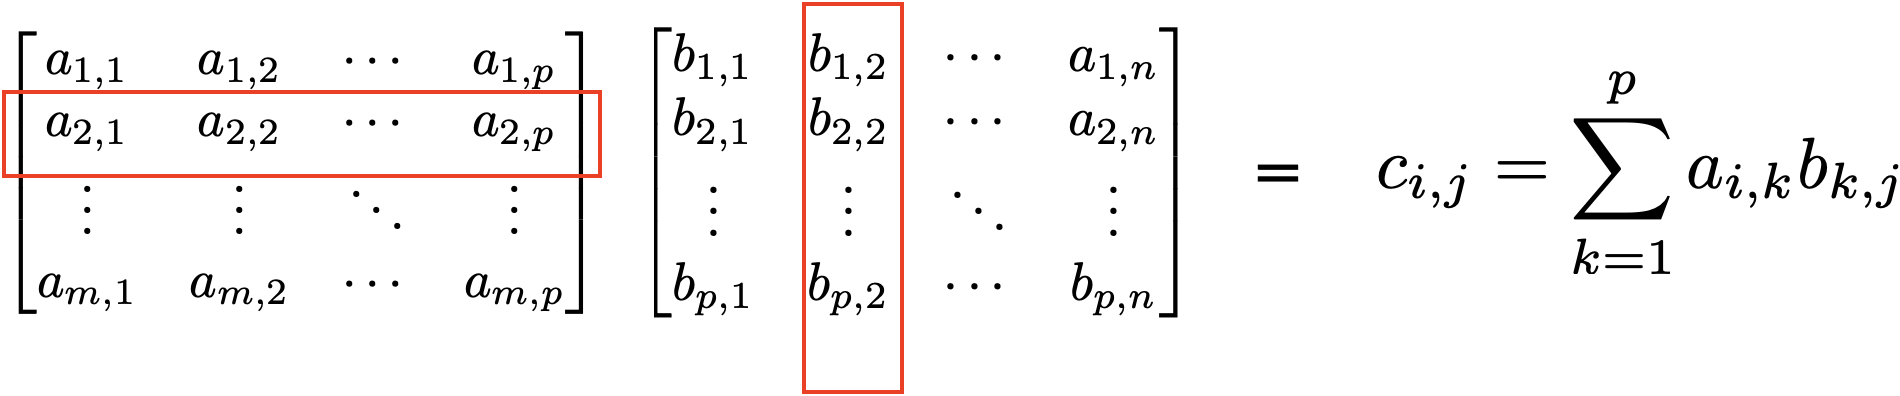{width=500}

Finally, be aware that matrix multiplication is not (generally) commutative! The order of the first and second matrix matter, and $\mathbf{A}\mathbf{B}$ need not be equivalent to $\mathbf{B}\mathbf{A}$ except under special circumstances!

## Special matrices

Here we'll learn about some special matrices that will come in handy when we are doing matrix calculations.

The first is rather simple.  We'll define _**square matrices**_ as those with the same number of rows and columns. 

The second is the **Identity** matrix, which is a square matrix where all the diagonal elements of the matrix are 1 and all other elements are 0.  In NumPy, we can get an identity matrix using `np.identity` (https://numpy.org/doc/stable/reference/generated/numpy.identity.html) or `np.eye` (https://numpy.org/doc/stable/reference/generated/numpy.eye.html).  The main difference is that `np.identity` always returns a square matrix, while `np.eye` could return a non-square matrix, if requested:

In [ ]:
I = np.identity(3)
I

The identity matrix has the property that, for square matrices:

$
AI = IA = A
$

Besides the identity matrix, we can speak of diagonal matrices in general, with a non-zero values along the diagonal (e.g. row 1, column 1; row 2, column 2, etc.), and zero everywhere else.  Diagonal matrices may be square or not.  

Two useful functions in Python allow us to quickly extract information from diagonal matrices: `np.diag` returns the values in a matrix along the diagonal, and `np.trace` returns the sum of the values along the diagonal:

In [ ]:
print(np.diag(I)) # the three 1s along the diagonal of identity matrix I
print(np.trace(I)) # sum of the three 1s along the diagonal of identity matrix I

A matrix need not be square or the identity matrix to use these tool, for instance:

In [ ]:
A = np.array([[1,2,3],[4, 5, 6]]) # this is a 2 row by 3 column matrix, A.shape
B = np.array([[10, 11],[20, 21],[30, 31]]) # this is a 3 row by 2 column matrix, B.shape

print(np.diag(A))
print(np.trace(B))

Another special type of matrix is a _**Symmetric Matrix**_, which is defined as a matrix which is equal to its transpose:

$
\mathbf{A} = \mathbf{A}^T 
$

The identity matrix is equal to its transpose, but so too are other square matrices -- for instance, a covariance or correlation matrix is symmetrical.  This will be an important feature we'll leverage later. 

Finally, we return to the issue of the _**matrix inverse**_.  We've already seen that one of the powerful things about the inverse of a matrix is that it allows us to do 'matrix division'.   More generally, the existence of a matrix inverse allows us to solve systems of linear equations (as we did above!), which is an analytical approach with vast applications that we'll only begin to explore in this class. 

As we saw above, a system of linear equations with a single unique solution will have an inverse.  But for many systems (and matrices) the inverse may not exist.  Let use define a new characteristic of a matrix called its _**determinant**_.  The determinant is a something we can calculate for square matrices only.  It is a scalar value calculated from the matrix itself.  Among other reasons, the determinant is important because it will be non-zero only if the matrix has an inverse!  Thus the determinant is a quick way to know if a particular matrix has an inverse at all. 

The formula for the determinant of a 2x2 matrix is simple, but gets more complex as we get to larger and larger matrices.  For a 2x2 matrix with values $a, b, c$, and $d$, the determinant (often writen as $det$) is:

$
\begin{vmatrix}
     a & b\\ 
     c & d\\
\end{vmatrix}
=ad - bc
$

In Python, we calculate the determinant using `numpy.linalg.det`:

In [ ]:
a = np.array([[1, 2], [3, 4]])
print(np.linalg.det(a)) # notice that NumPy returns a float with machine precision

Another important characteristic of a matrix is called the _**condition number**_, or $cond$.  The condition gives an indication of the accuracy of the results of a matrix inversion - if the inversion is a 'good' one (generally valid and reasonably accurate), you should expect a $cond$ value near to 1 (ish).  _**Ill-conditioned**_ matrices (and their inverse, if it exists) are sensitive to very small perturbations -- approximations, round-offs, and precision of the computation itself -- and the condition number may be very large or even return as `inf` (infinite).  In Python, you can calculate the condition using `numpy.linalg.cond`: 

In [ ]:
# this is our coefficient matrix from above - the set of scalars in from of each x
A = np.matrix([[1, 1], [2, -1]])
print(np.linalg.cond(A))

Now let us return to the matrix inverse and consider what we've learned.  We define a **square matrix as invertible if**:

$
A^{-1}A = I
$

and 

$
AA^{-1} = I
$

If a matrix is invertible, we also say it is nonsingular and nondegenerate.   For an invertible matrix, we will find that the determinant is non-zero and the condition number will be close-ish to 1. 

Recall again our system of linear equations with which we started, and which we know has a unique solution and a valid inverse of the matrix **A**:

$
\mathbf{A} = \begin{bmatrix} 1 & 1\\ 2 & -1\end{bmatrix}
$

We find that it indeed has a determinant that is non-zero and a condition close to 1, as we would expect:

In [ ]:
A = np.matrix([[1, 1], [2, -1]])
print('The determinant of A is', np.linalg.det(A))
print('The condition number of A is', np.linalg.cond(A))

Remember, though, not all matrices have a valid inverse!  If the inverse $\mathbf{A}^{-1}$ _doesn't_ exist, we say that $\mathbf{A}$ is **singular**. 

Remember the case above where there was no solution to the system of linear equations? The two equations described lines in 2 dimensions that were parallel and therefore there were no solutions to the system:

$
2x_1 - x_2 = -1\\
2x_1 - x_2 = 3
$



In [ ]:
A = np.matrix([[2, -1], [2, -1]])
print('The determinant of A is', np.linalg.det(A))
print('The condition number of A is', np.linalg.cond(A))


You can see that the determinant is indeed zero, and the condition number is returned as infinity!  Not good!  This tells us that the matrix **A** corresponding to that system of equations is singular and has no inverse.  Which makes sense, right?  There is no solution that satisfies the entire system. 

What about the case where we found no unique solutions, but rather an infinite number of possible solutions, for two overlapping lines where one equation in the system was simply a scalar multiple of the other? 

$
2x_1 - x_2 = 3\\
6x_1 - 3x_2 = 9
$

In [ ]:
A = np.matrix([[2, -1], [6, -3]])
print('The determinant of A is', np.linalg.det(A))
print('The condition number of A is', np.linalg.cond(A))


Once again, we see that the determinant of the matrix **A** is zero and the condition number is gigantic!  Once again, in a system without a unique solution, we find the matrix to be singular and degenerate.  The matrix is also ill-conditioned.  And earlier we saw it was rank-deficient.  Whew. 

I don't mean to be mean to this matrix (or any other matrix), but one thing we've learned here is a system where the coefficients in the **A** matrix are linear combinations of some other set of numbers in the matrix, that matrix will be singular, degenerate, ill-conditioned, and rank deficient.  

And guess what _our_ data is? 

An example about why this might matter.  We often want to solve a linear regression problem where we find the coefficients that describe the linear through a set of $\mathbf{X}$ and $y$ data.  For large and/or multi-dimensional datasets, this becomes a non-trivial calculation, so we ask the computer to do it - we ask our program 'what are the coefficients $\beta$ that solve the ordinary least squares problem:'

$
y = \mathbf{X}\beta + \epsilon
$

It turns out, linear algebra provides a way to estimate  ($\hat{\beta}$) these beta coefficients in linear regression!

$
\hat{\beta} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}y
$

We see some familiar features in that equation (the transpose, for instance) but perhaps most worryingly, we notice that the inverse of the data matrix $\mathbf{X}$ is necessary to estimate the coefficients.  But what if our data matrix is linearly dependent, singular, degenerate, ill-conditioned, and rank deficient?  Then what?  

## Concluding thoughts

What I hope this lecture-notebook provides you with is a useful and practical introduction to matrix algebra and by extension some of the ways to get Python to _do_ linear algebra.  

Also, we're on our way to thinking about how we will will approach our data with the mathematical tools from matrix algebra that allow us to deal with the benefits and challenges of spatiotemporal data. _Our_ data will likely always be linearly dependent.

So, we’d like to find ways of isolating common dependent patterns or modes in order to better understand the systems we’re studying, but also to deal with the negative effects of dependence in our data.  Our methods in this class will arise out of the need to deal with and interpret dependent, rank deficient, and ill-conditioned data by using the tools for solving systems of linear equations.